/workspaces/Schule/Rossmann/Data cleaning EDA Feature Engeenering.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('data/train.csv')
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


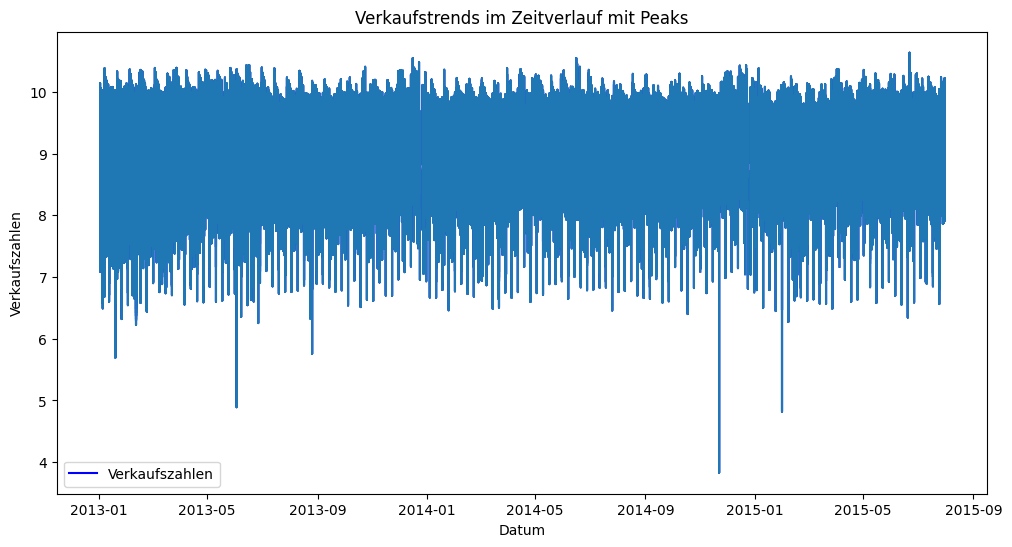

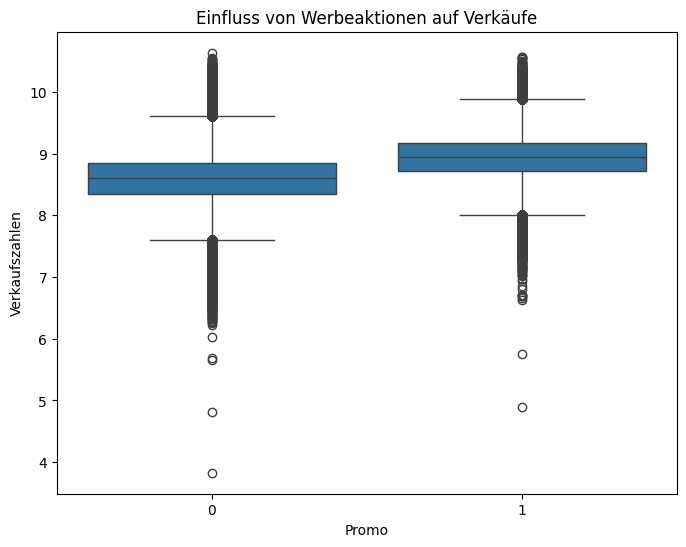

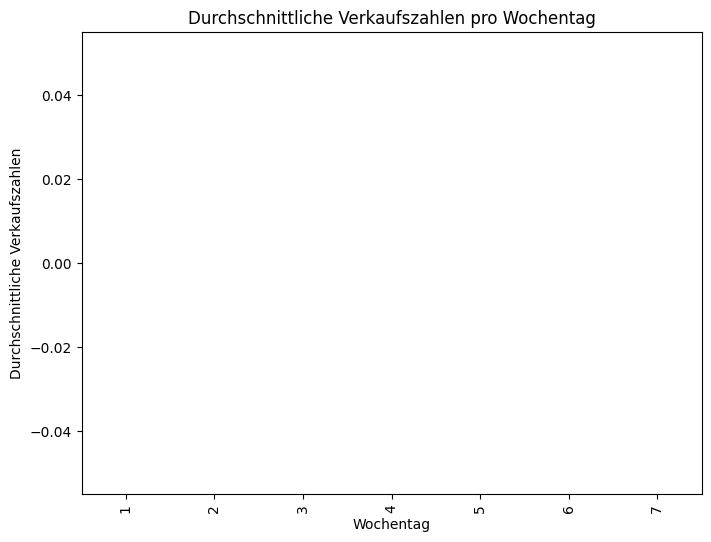

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

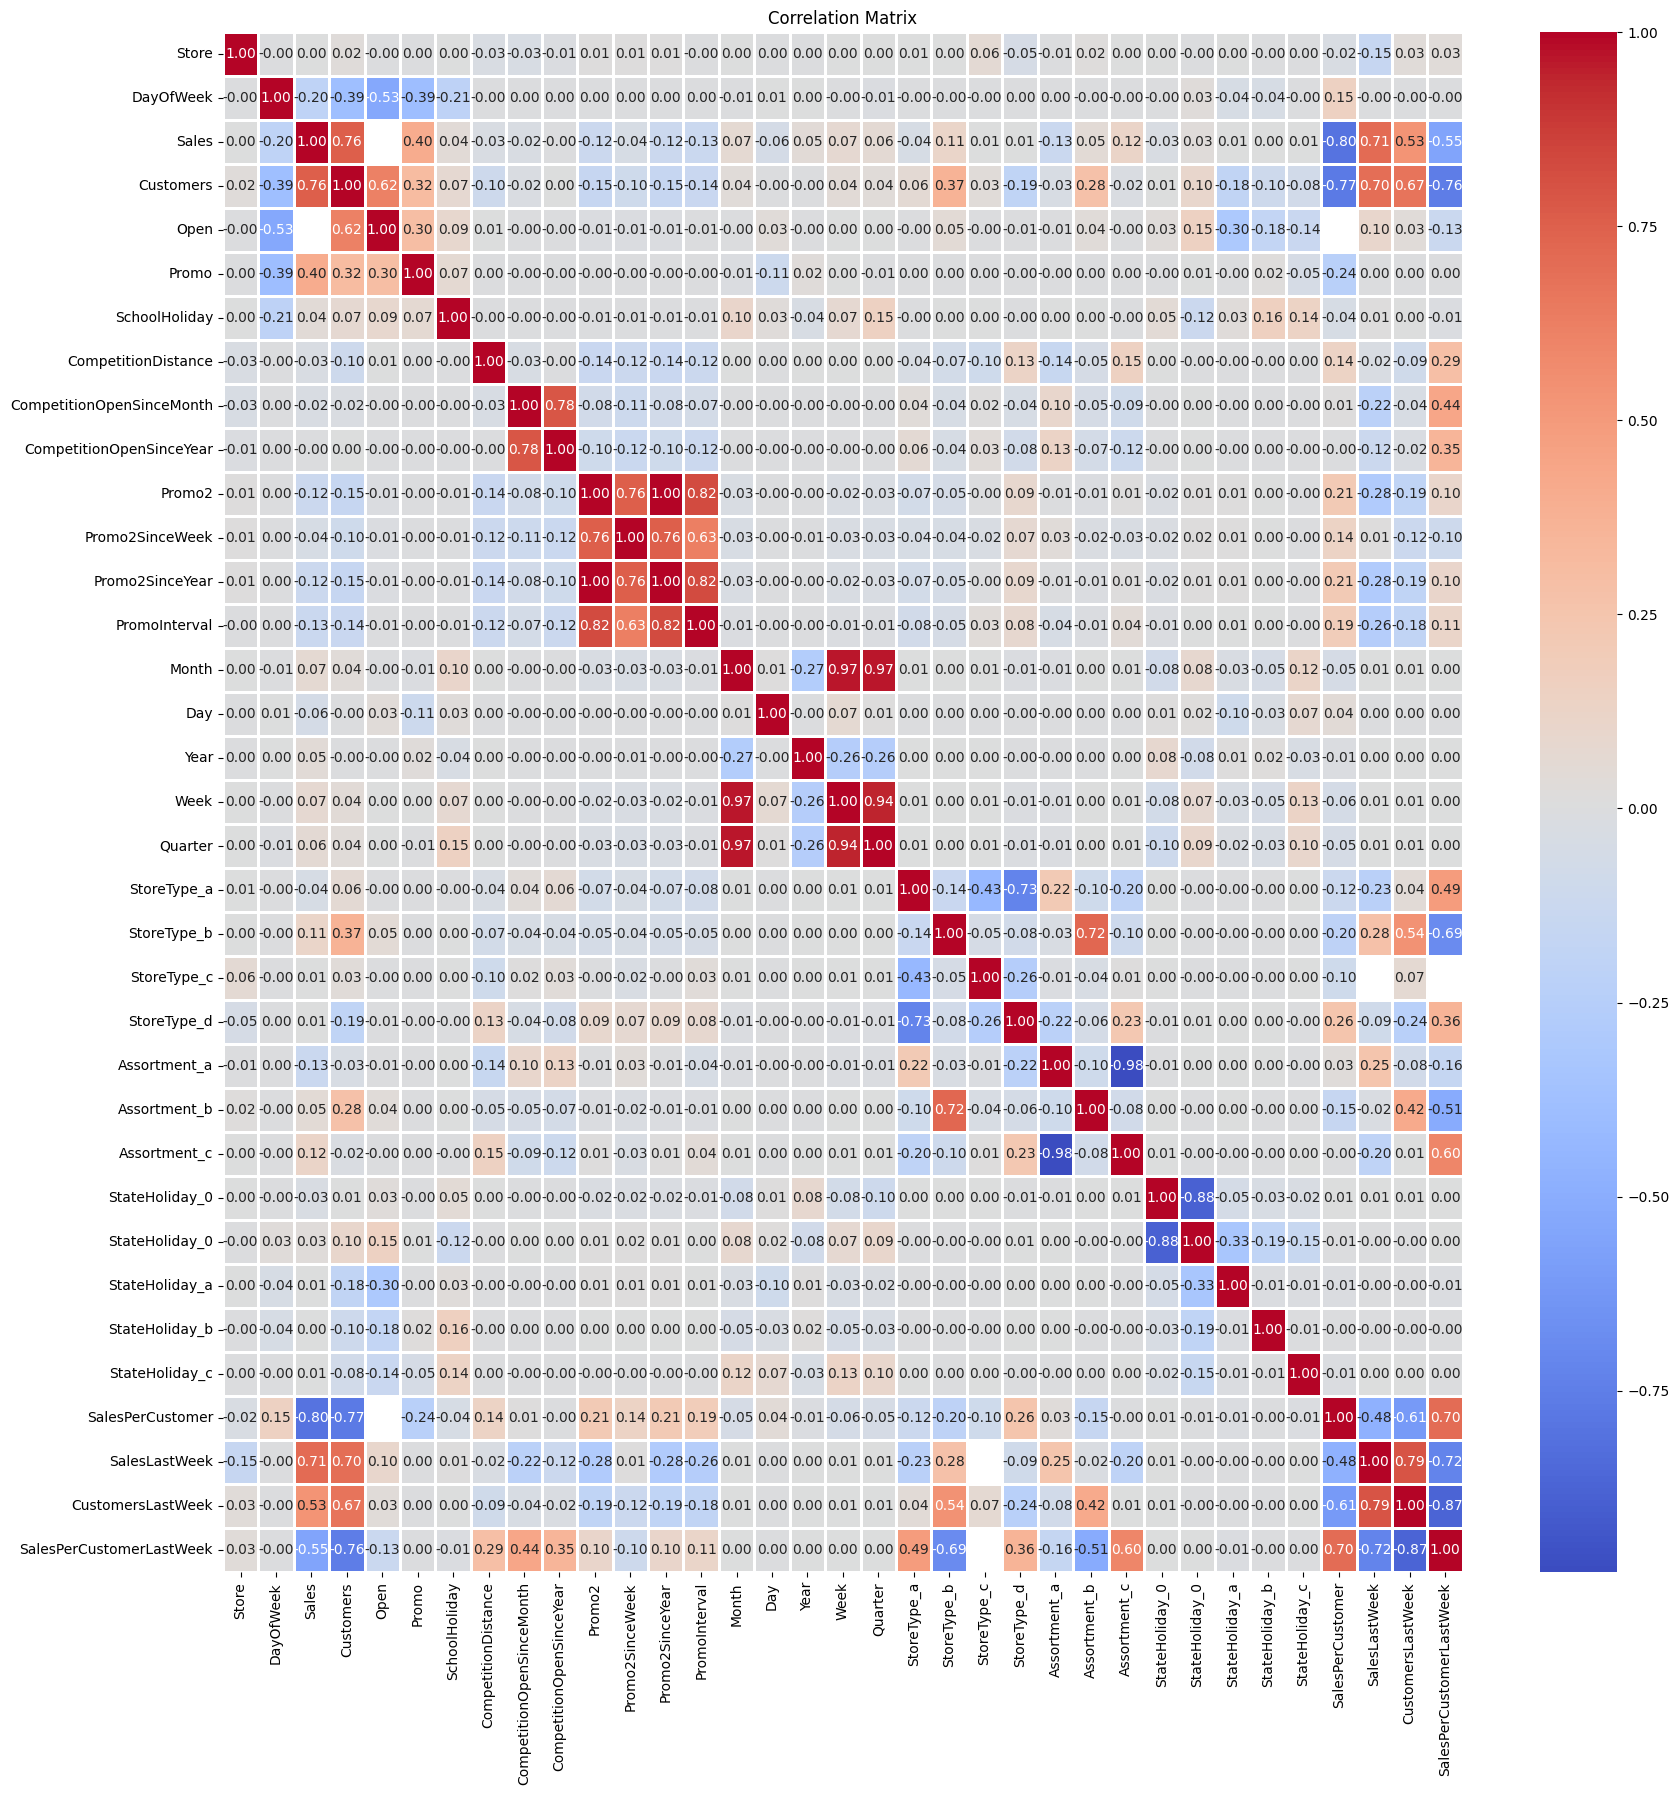

In [7]:
%run "Data cleaning EDA Feature Engeenering.py"

In [6]:
df_trainstore.sample(100)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Assortment_c,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SalesPerCustomer,SalesLastWeek,CustomersLastWeek,SalesPerCustomerLastWeek
853503,937,7,-inf,0,0,0,0,2810.0,0.0,0.0,...,0,0,1,0,0,0,-inf,-inf,3762,-inf
837624,920,5,8.417815,551,1,0,0,850.0,2.0,2012.0,...,0,0,1,0,0,0,0.015277,-inf,3950,-inf
335726,369,2,8.745762,536,1,1,1,5870.0,4.0,2014.0,...,1,0,1,0,0,0,0.016317,-inf,3639,-inf
729786,801,2,8.519590,469,1,1,1,48330.0,4.0,2013.0,...,0,0,1,0,0,0,0.018165,-inf,3855,-inf
417149,458,5,-inf,0,0,1,1,3390.0,0.0,0.0,...,0,0,0,0,1,0,-inf,-inf,4554,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155548,172,6,9.133891,1013,1,0,0,110.0,0.0,0.0,...,0,0,1,0,0,0,0.009017,-inf,5296,-inf
454090,498,4,8.766082,794,1,1,0,990.0,0.0,0.0,...,0,0,1,0,0,0,0.011040,-inf,5396,-inf
788972,866,1,9.229064,611,1,1,0,9680.0,0.0,0.0,...,0,0,1,0,0,0,0.015105,-inf,3215,-inf
89777,99,4,8.278428,373,1,1,0,2030.0,11.0,2003.0,...,1,0,1,0,0,0,0.022194,-inf,3169,-inf


In [3]:
# smaller dataset for faster processing
df_trainstore_frac = df_trainstore.sample(frac=0.05, random_state=42)

In [4]:
from sklearn.model_selection import train_test_split

X = df_trainstore_frac.drop('Sales', axis=1)
y = df_trainstore_frac['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# create knn model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

# fit model
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# evaluate with rmspe
from sklearn.metrics import mean_squared_error
import numpy as np

rmspe = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSPE:', rmspe)


ValueError: Input X contains infinity or a value too large for dtype('float64').